In [50]:
from glob import glob
from skimage.io import imread,imshow
import cv2


In [51]:
X=[]
y=[]

In [52]:
for file in glob("C:\\Cats Vs Dogs\\train\\*.jpg"):
    if 'cat' in file.split('\\')[-1]:
        y.append(1)
    else:
        y.append(0)
    image=imread(file)
    image=cv2.resize(image,(224,224))
    X.append(image)
            

In [53]:
import numpy as np

In [54]:
X=np.array(X)
y=np.array(y)

In [55]:
X.shape,y.shape

((25000, 224, 224, 3), (25000,))

In [56]:
import random

In [57]:
idx=random.sample(range(0,25000),5000)

In [58]:
idx

[3448,
 17179,
 3159,
 15241,
 6100,
 24339,
 1054,
 14606,
 19784,
 17760,
 18751,
 12541,
 973,
 6991,
 16168,
 21372,
 7348,
 14631,
 14592,
 14388,
 6577,
 11836,
 18645,
 15918,
 19502,
 12084,
 19080,
 10598,
 16825,
 19412,
 15700,
 3390,
 1272,
 19021,
 19429,
 24853,
 19174,
 22777,
 9183,
 1107,
 7731,
 6276,
 13658,
 6157,
 12338,
 9166,
 1359,
 14126,
 21329,
 5499,
 12647,
 8331,
 11068,
 24346,
 17952,
 866,
 1180,
 23346,
 11981,
 19772,
 6180,
 7989,
 18302,
 3407,
 20284,
 4909,
 13788,
 21922,
 138,
 10572,
 14185,
 4295,
 20075,
 13627,
 16827,
 4070,
 22054,
 10393,
 2596,
 10951,
 6493,
 2871,
 1969,
 5844,
 8228,
 8887,
 22984,
 23942,
 6837,
 19666,
 8547,
 8072,
 506,
 13867,
 7643,
 11615,
 22040,
 15925,
 6273,
 15015,
 11730,
 18856,
 5357,
 20051,
 20913,
 925,
 15412,
 331,
 10268,
 15034,
 9236,
 16603,
 9899,
 18773,
 20236,
 10046,
 4042,
 13506,
 14301,
 4055,
 8367,
 3640,
 20199,
 19995,
 3189,
 19904,
 17462,
 12398,
 22663,
 5316,
 17497,
 17702,
 1

In [59]:
X_random=X[idx]
y_random=y[idx]

In [66]:
y_random[:100]

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

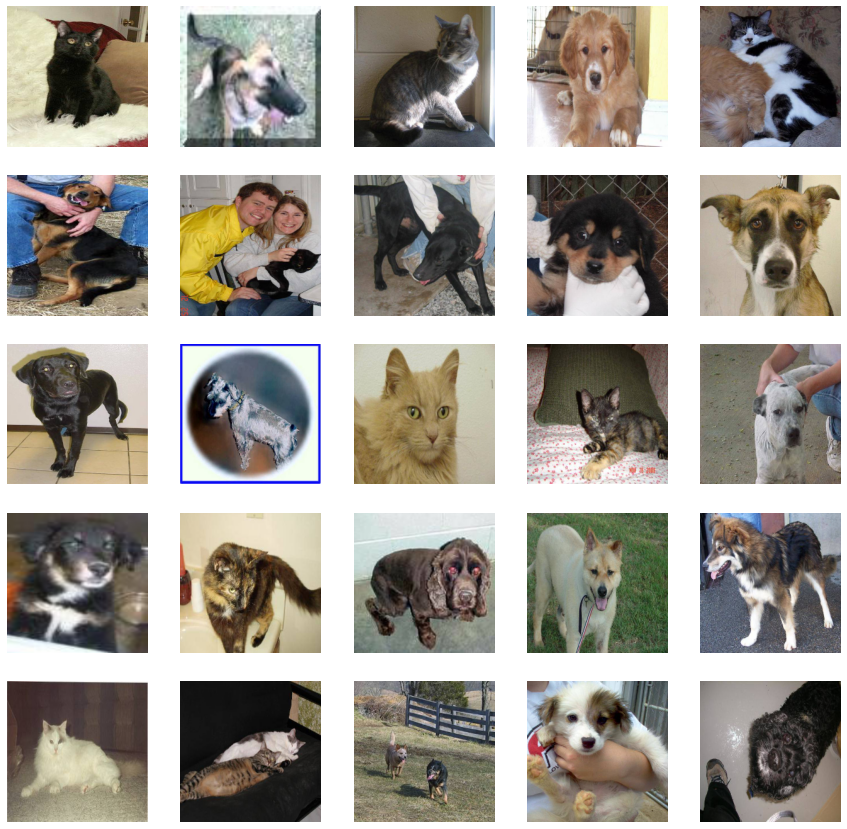

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_random[i])
    plt.axis('off')

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_tes,y_train,y_test=train_test_split(X_random,y_random,test_size=0.2)

In [68]:
from keras. models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense

In [71]:
model = Sequential()
model.add((Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3))))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [72]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])


In [74]:
history=model.fit(X_train,y_train,validation_data=(X_tes,y_test),epochs=1,batch_size=64)

63/63 [==============================] - 184s 3s/step - loss: 263.1364 - accuracy: 0.5230 - val_loss: 0.7017 - val_accuracy: 0.5690


In [77]:
model.save("C:\\Cats Vs Dogs\\model.h5")

In [79]:
image=imread('C:\\Users\\hemav\\OneDrive\\Pictures\\dog.jpeg')

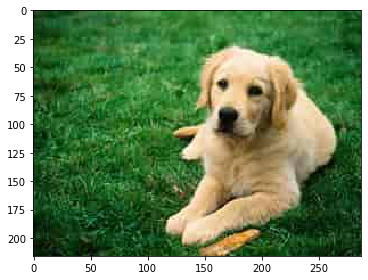

In [80]:
imshow(image)

In [81]:
image.shape

(216, 288, 3)

In [82]:
image=cv2.resize(image,(224,224))

In [83]:
image.shape

(224, 224, 3)

In [84]:
a=model.predict(image.reshape(1,224,224,3))
if a==1:
    print('Cat')
else:
    print('Dog')

1/1 [==============================] - 0s 268ms/step
Dog
